<div style="direction:rtl; text-align:right">

# المشروع الثالث: هل تستطيع توقع إيجارات المنازل؟

<div style="direction:rtl; text-align:right">
أهلاً بكم في المشروع الثالث من علم البيانات. في هذا المشروع، سنعمل معا على بيانات إيجارات المنازل بناء على الكثير من السمات وذلك في البيانات الموجودة في هذا الرابط من موقع كاقل:

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques

<div style="direction:rtl; text-align:right">
ملاحظة: عليك تعديل الخانات التي يوجد فيها الكود أدناه قبل تسليم المشروع. جميع الخانات الأخرى يجب ان تبقى كما هي بدون أي 
تعديل.

```
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
```

<div style="direction:rtl; text-align:right">
سنقوم أولاً بإحضار المكتبات اللازمة

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# قراءة البيانات

<div style="direction:rtl; text-align:right">
بعد أن قمنا بتنزيل البيانات من موقع كاقل، سنقوم هنا بقراءة البيانات. ولاحظ أن لدينا بيانات تدريب وبيانات اختبار. سنقوم هنا بدمج البيانات مع بعض (مع عزل سعر المنزل، المتغير الذي علينا توقع قيمته لاحقا).

In [42]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [43]:
train_ids = train_data['Id']

In [44]:
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [45]:
test_ids = test_data['Id']

In [46]:
train_data['LotConfig'].value_counts().keys()[0]

'Inside'

<div style="direction:rtl; text-align:right">
وهنا نقوم بعزل متغير سعر المنزل.. وبعد ذلك سنقوم بحذفه من بيانات التدريب.

In [47]:
y = train_data['SalePrice']

In [48]:
train_data.drop(columns='SalePrice', inplace=True)

In [49]:
train_data.set_index('Id', inplace=True)

In [50]:
test_data.set_index('Id', inplace=True)

<div style="direction:rtl; text-align:right">
وأخيرا سنقوم بدمج الجدولين باستخدام الأمر concat:

In [51]:
data = pd.concat([train_data, test_data], axis=0)

In [52]:
data.shape

(2919, 79)

In [53]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<div style="direction:rtl; text-align:right">
في هذه البيانات، لدينا عدد ضخم من متغيرات التنبؤ. وسنقضي هذا المشروع في النظر إلى هذه البيانات وتنقيحها ومن ثم إنشاء نموذج للتنبؤ بسعر المنزل. 

<div style="direction:rtl; text-align:right">

# تجهيز البيانات

<div style="direction:rtl; text-align:right">
في البداية، لنكتشف المتغيرات وأنواعها. يمكنك العودة إلى ملف وصف البيانات لقراءة وصف كل متغير.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<div style="direction:rtl; text-align:right">
يبدو أن لدينا خليط بين المتغيرات الرقمية (int64 أو float64) والمتغيرات الفئوية (object). كما أن لدينا العديد من البيانات المفقودة. بشكل عام، لا ينصح التخلص من البيانات المفقودة لأن فقدان البيانات بحد ذاته قد يكون عاملاً مساهماً في توقع سعر المنزل.

<div style="direction:rtl; text-align:right">
لمعرفة مجموع الخانات المفقودة في كل متغير سنقوم باستخدام الأمر التالي:

In [55]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

<div style="direction:rtl; text-align:right">
نظراً لوجود عدد كبير من المتغيرات نلاحظ أن الأمر السابق لم يقم بطبع جميع المتغيرات. كما نلاحظ أن هناك الكثير من المتغيرات التي لا يوجد لها أي بيانات مفقودة. في الأمر التالي، سنقوم بطباعة المتغيرات وعدد الخانات المفقودة فقط إن كان لديها خانات مفقودة:

In [56]:
missing_data = data.isnull().sum()

In [57]:
for k, v in missing_data.items():
    if v>0 : 
        print(k,':\t' , v)

MSZoning :	 4
LotFrontage :	 486
Alley :	 2721
Utilities :	 2
Exterior1st :	 1
Exterior2nd :	 1
MasVnrType :	 24
MasVnrArea :	 23
BsmtQual :	 81
BsmtCond :	 82
BsmtExposure :	 82
BsmtFinType1 :	 79
BsmtFinSF1 :	 1
BsmtFinType2 :	 80
BsmtFinSF2 :	 1
BsmtUnfSF :	 1
TotalBsmtSF :	 1
Electrical :	 1
BsmtFullBath :	 2
BsmtHalfBath :	 2
KitchenQual :	 1
Functional :	 2
FireplaceQu :	 1420
GarageType :	 157
GarageYrBlt :	 159
GarageFinish :	 159
GarageCars :	 1
GarageArea :	 1
GarageQual :	 159
GarageCond :	 159
PoolQC :	 2909
Fence :	 2348
MiscFeature :	 2814
SaleType :	 1


<div style="direction:rtl; text-align:right">
نجد أن بعض المتغيرات لديها قيم مفقودة قليلة جدا بينما متغيرات أخرى لديها قيم كثيرة جدا. كما نرى أن بعض القيم مكررة مثل 159 و 82 أو قريبة جداً من بعض. هذه الملاحظات مهم جداً وضعها في الحسبان حتى نقرر هل نبقيها ام نحذفها؟ ربما هذه المتغيرات قادمة من منطقة محددة أو لها صفات محددة. ولكن لن نخوض في أي من هذه التفاصيل الآن.

<div style="direction:rtl; text-align:right">
نريد الآن أن نستخرج قائمتين من الأعمدة: القائمة الأولى فيها الأعمدة الفئوية (categorical_cols) بينما القائمة الأخرى تحتوي الأعمدة الرقمية. قم باستخراج الأعمدة في الخانات التالية:

In [58]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

# HINT:   you will use data.columns to extract all columns
#         Then press data.dtypes and see what you get
# You can also use    np.isin( )

categorical_cols = data.columns[data.dtypes=='object']
numerical_cols = data.columns[np.isin(data.dtypes, ['int64', 'float64'])]
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [59]:
assert len(categorical_cols) == 43, 'Wrong number of categorical columns'
assert len(numerical_cols) == 36, 'Wrong number of neumerical columns'
print('OK! You may proceed.')

OK! You may proceed.


In [60]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
data[categorical_cols].isna().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [62]:
data.dtypes== np.object

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition     True
Length: 79, dtype: bool

<div style="direction:rtl; text-align:right">
سنبدأ بتجهيز الأعمدة الفئوية، نحتاج لأن نتصرف مع القيم الفارغة في الأعمدة الفئوية،
نحتاج دالة تعطينا أسماء الأعمدة الفئوية التي تحتوي قيم فارغة، قم بتعديل الدالة أدناه لتعطينا قائمة بهذه الأسماء

In [63]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

def extract_categorical_cols_with_nans(data):
    # you can use `categorical_cols` in here
    categorical_cols_w_nans = data[categorical_cols].columns[data[categorical_cols].isnull().sum() > 0].tolist()   
    return categorical_cols_w_nans

categorical_null = extract_categorical_cols_with_nans(data)

In [64]:
len(data[categorical_cols].columns[data[categorical_cols].isna().any()])

23

In [65]:
assert len(categorical_null) == 23, 'Wrong number of null categorical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">
سنقوم بتقسيم الأعمدة الفئوية ذات القيم الفارغة لقسمين: قسم للحذف و قسم للتعديل
سنحذف الأعمدة التي تحوي قيم فارغة في أكثر من نصفها
و سنعوض القيم الفارغة في بقية الأعمدة  
سنستخرج أسماء الأعمدة التي يجب حذفها (القيم الفارغة فيها أكثر من النصف)
و الأعمدة التي يجب استبدال القيم الفارغة فيها (القيم الفارغة فيها أقل أو تساوي النصف)

In [66]:
to_remove = []  # الأعمدة التي يجب حذفها
to_fillna = []  # الأعمدة التي يجب استبدال القيم الفارغة فيها

for col in categorical_null:
    
    if len(data) - data[col].isna().sum() < len(data) / 2:
        to_remove.append(col)
    else:
        to_fillna.append(col)
        
to_remove

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [67]:
assert len(to_remove) == 4, 'Wrong number of categorical columns'
assert len(to_fillna) == 19, 'Wrong number of categorical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">
بعد أن قمنا باستخراج الأعمدة، قم أولا بحذف الأعمدة التي يجب حذفها (to_remove)  

In [68]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
data.drop(columns=to_remove, inplace=True)

<div style="direction:rtl; text-align:right">
قم الآن بتحديث قائمة المتغيرات الفئوية ( يجب ألا تحوي الأعمدة التي حذفتها)

In [69]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
categorical_cols = list(set(categorical_cols)-set(to_remove))

In [70]:
assert len(categorical_cols) == 39, 'Wrong number of categorical columns'
print('OK! You may proceed.')

OK! You may proceed.


<div style="direction:rtl; text-align:right">
بالنسبة للأعمدة في متغير  
to_fillna  
قم بملء القيم الفارغة بالقيمة الأكثر تكرارًا في كل عمود
أو قم بتعويضها بقيمة مميزة بالنسبة لكل عمود

In [71]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

for col in to_fillna:
    data[col]= data[col].fillna(-1)

In [72]:
categorical_cols1 = list(categorical_cols)
categorical_cols2 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
set(categorical_cols1) == set(categorical_cols2)

True

<div style="direction:rtl; text-align:right">
سنتعامل أولاً مع المتغيرات الفئوية. بخصوص المتغيرات الفئوية، سنقوم بتحويلها إلى عدة أعمدة رقمية (1 أو 0  لكل عمود) تماماً كما فعلنا في المشروع الأول باستخدام الأمر pd.get_dummies. ولكن هذه المرة ستكتبها أنت داخل الأمر أدناه.

<div style="direction:rtl; text-align:right">
الآن سوف نستخدم الكود السابق ولكن داخل حلقة تكرارية (for) حتى تسهل العملية. عليك إكمال الكود أدناه ولكن لا تنس أن تستخدم الأمر drop لحذف العمود الأصلي.

In [73]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

def convert_categorical_to_dummies(df):
    # HINT: you use `categorical_cols` here
    # also: you should set dummy_na to TRUE (this is new)
    
    
    # extract dummy variables first (use dummy_na= True) to keep missing data marked
    # then add them to the end of original `df`
    # then drop the original variable from df (use inplace=True)


    for column_name in categorical_cols:
        dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=False, dummy_na=True)
        df = pd.concat([df, dummies] ,axis=1)
        df.drop(columns=column_name, inplace=True) 
    return df


<div style="direction:rtl; text-align:right">
هنا سنقوم باستخدام الأمر الذي أنشاناه أعلاه:

In [74]:
data = convert_categorical_to_dummies(data)

In [75]:
assert data.shape[1] == 333, 'Wrong shape.'
print('Ok! You may proceed!')

Ok! You may proceed!


In [76]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_nan',
       'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofStyle_nan'],
      dtype='object', length=333)

<div style="direction:rtl; text-align:right">
نستطيع استخدام الأمر describe لوصف الأعمدة الرقمية:

In [77]:
data[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<div style="direction:rtl; text-align:right">
نريد الاستعلام عن عدد المتغيرات الرقمية التي تحوي قيماً مفقودة وذلك لمعالجتها. في الخانة التالية، سنقوم بطباعة أسماء الأعمدة الرقمية ذات القيم المفقودة  (باستخدام numerical_cols). هل تستطيع أن تكمل المهمة ؟ يجب أن تكتب البرنامج  في الأمر أدناه.

In [78]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

def extract_numerical_cols_with_nans(data):
    # you can use `numerical_cols` in here
    numerical_cols_w_nans = data[numerical_cols].columns[data[numerical_cols].isnull().sum() > 0].tolist()   

    return numerical_cols_w_nans

numerical_cols_w_nans = extract_numerical_cols_with_nans(data) # save as a list

numerical_cols_w_nans

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

<div style="direction:rtl; text-align:right">
بعد تفحص البيانات المفقودة، وجدنا أن عدداً من الأعمدة الرقمية لديها بيانات مفقودة. والسؤال الآن هو كيف نتعامل مع البيانات المفقودة؟

In [79]:
assert len(numerical_cols_w_nans)==11, 'Numerical Columns with NaNs are in the wrong shape!'

<div style="direction:rtl; text-align:right">
لنقم أولاً بتفحص توزيع الأعمدة لكل من هذه المتغيرات باستخدام المثال التالي:

<AxesSubplot:ylabel='Frequency'>

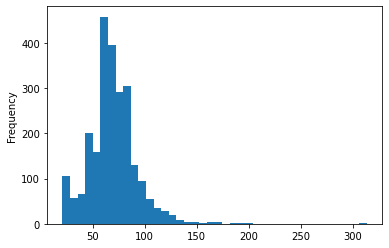

In [80]:
data['LotFrontage'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
في LotFrontage، نجد أن البيانات تتبع توزيعا طبيعياً باستثناء بعض القيم العالية جد في أقصى اليمين (بعد 300). وبالتالي تعويض البيانات المفقودة بالوسيط (Median) قد يبدو خياراً مناسباً. لاحظ أن هذا المتغير هو أكثر متغير لديه قيم مفقودة.

<AxesSubplot:ylabel='Frequency'>

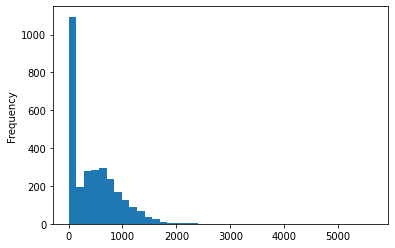

In [81]:
data['BsmtFinSF1'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
نجد أن عدد كبير من البيانات لديه قيمة 0 بينما باقي القيم تتناقص كلما زادت المساحة. هنا نستطيع التعويض بقيمة فريدة للقيم المفقودة ولتكن -1.

<AxesSubplot:ylabel='Frequency'>

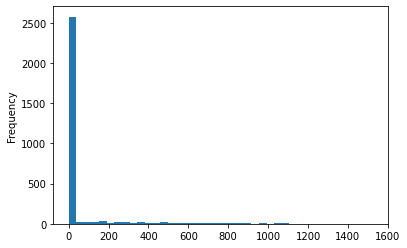

In [82]:
data['BsmtFinSF2'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
نجد أن عدد كبير من البيانات لديه قيمة 0 بينما باقي القيم بالكاد نراها. هنا نستطيع التعويض ب -1

<AxesSubplot:ylabel='Frequency'>

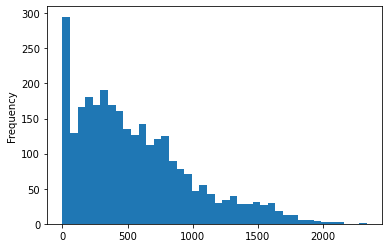

In [83]:
data['BsmtUnfSF'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
هنا نجد نمطاً مشابهاً ومتكرراً، وهو أن أغلب البيانات موزعة حول قيمة 0 ولكن باقي القيم تتناقص بعد ذلك مع ازدياد المساحة. هنا سنقوم بالتعويض ب -1.

<AxesSubplot:ylabel='Frequency'>

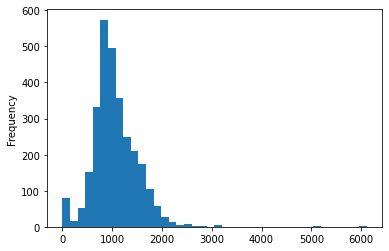

In [84]:
data['TotalBsmtSF'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
هنا نستطيع أن نرى توزيعاً طبيعياً واضحا بما يعني أننا نستطيع استخدام الوسيط الحسابي.

<AxesSubplot:ylabel='Frequency'>

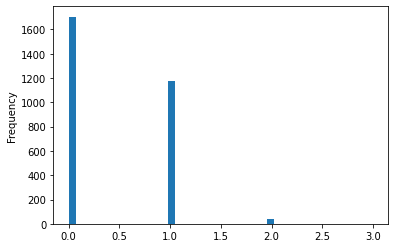

In [85]:
data['BsmtFullBath'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
هذا المتغير يقيس عدد دورات المياه (الكاملة) في الدور الأرضي وكما نرى القيم حول 0 و 1 و 2. سنقوم باستخدام -1 للتعويض عن القيم المفقودة هنا.

<AxesSubplot:ylabel='Frequency'>

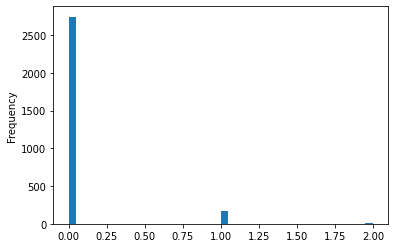

In [86]:
data['BsmtHalfBath'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
هذا المتغير يقيس عدد دورات المياه (التي يوجد فيها تواليت فقط) في الدور الأرضي وكما نرى القيم حول 0 و 1 و 2. سنقوم باستخدام -1 للتعويض عن القيم المفقودة هنا.

<AxesSubplot:ylabel='Frequency'>

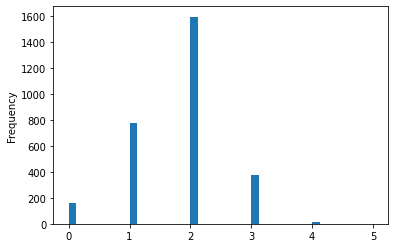

In [87]:
data['GarageCars'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
عدد السيارات في القراج، ومن الواضح أننا سوف نستخدم -1 للتعويض عن القيم المفقودة هنا.

<AxesSubplot:ylabel='Frequency'>

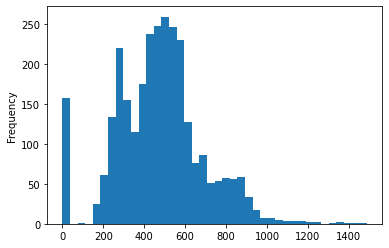

In [88]:
data['GarageArea'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
مساحة القراج تتبع توزيعا شبه طبيعي. في الحقيقة من الصعب ترجيح خيار على آخر، لكن قيمة -1 للخانة المفقودة في هذا المتغير تبدو خياراً أسلم.

<AxesSubplot:ylabel='Frequency'>

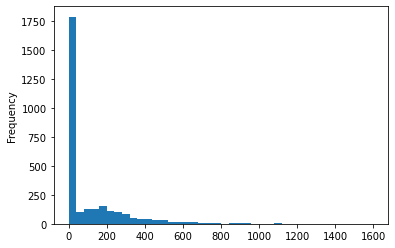

In [89]:
data['MasVnrArea'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
هذا المتغير يحوي على 8 قيم مفقودة فقط، ولكن توزيع الأعداد مختلف تماماً حيث أغلب القيم عبارة عن قيمة 0. ماذا نفعل بالقيم المفقودة؟ التعويض بالمتوسط أو الوسيط لا معنى له في هذه الحالة. فهنا إما أن نضع القيمة المفقودة 0 أو نختار قيمة فريدة تعبر عن القيم المفقودة حتى تساهم في توقعات النموذج، مثل -1 (كما شرحنا في الدرس).

<AxesSubplot:ylabel='Frequency'>

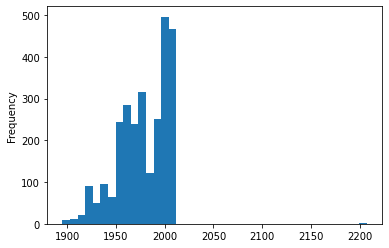

In [90]:
data['GarageYrBlt'].plot.hist(bins=40)

<div style="direction:rtl; text-align:right">
متغير GarageYrBlt يحوي على 81 قيمة مفقودة. وبالنظر إلى توزيع السنوات نجد أن لدينا توزيع متعرج قليلاً وهنا يصعب استخدام المتوسط أو الوسيط. فليس أمامنا سوى اختيار قيمة فريدة تعبر عن القيم المفقودة ولتكن -1.

<div style="direction:rtl; text-align:right">
بناء على المقترحات أعلاه، الآن هو دورك في استبدال القيم المفقودة بالقيم الجديدة.

In [91]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

# YOUR CODE HERE.



data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['BsmtFinSF1'].fillna(-1, inplace=True)
data['BsmtFinSF2'].fillna(-1, inplace=True)
data['BsmtUnfSF'].fillna(-1, inplace=True)
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].median(), inplace=True)
data['BsmtFullBath'].fillna(-1, inplace=True)
data['BsmtHalfBath'].fillna(-1, inplace=True)
data['GarageCars'].fillna(-1, inplace=True)
data['GarageArea'].fillna(-1, inplace=True)
data['MasVnrArea'].fillna(-1, inplace=True)
data['GarageYrBlt'].fillna(-1, inplace=True)

In [92]:
assert (data==-1).sum().sum() == 191, 'Did you fill in missing values the right way ?'

In [93]:
assert data.isnull().sum().sum() == 0, 'There are still NaNs! Task is not completed.'

<div style="direction:rtl; text-align:right">
بعد التعامل مع القيم المفقودة، قد يكون من المناسب أن نفكر ما إن كنا نريد تسوية البيانات أم لا. في الحقيقة أن تسوية البيانات قد لا تعني شيئاً لأن جميع المساحات بحسب الوصف مقاسة بنفس الوحدات وهي قدم مربع (square feet). لكن إن كنا في سيناريو وجدنا فيه أن المساحات تتبع وحدات مختلفة، ففي هذه الحالة علينا تسوية البيانات قبل إخضاعها لأي تحليل.

<div style="direction:rtl; text-align:right">

# نمذجة البيانات

<div style="direction:rtl; text-align:right">
سنقوم الآن بإنشاء نموذج للتنبؤ بأسعار المنزل من خلال البيانات الموجودة. في هذه المرة سوف نستخدام الغابات العشوائية. تستطيع قراءة المزيد عن الغابات العشوائية من خلال هذا الدرس الموجز:

- https://www.syr-res.com/article/11885.html

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

<div style="direction:rtl; text-align:right">
أسهل وأسرع طريقة لمعرفة أداء النموذج هي باستخدام الأمر cross_val_score حيث يقوم هذا الأمر بتقسيم البيانات إلى بيانات تدريب وبيانات اختار باستخدام التحقق المتقاطع ومن ثم إجراء النمذجة بدون أي حاجة للتدخل. بعد ذلك، سنقوم بطباعة معدل "الدرجات" لنعرف بشكل عام عن متوسط أداء النموذج قبل تطبيقه على بيانات جديدة. سنقوم باستخدام مربع الترابط (R^2) للتحقق من النموذج.

<div style="direction:rtl; text-align:right">
ولكن قبل تنفيذ التحقق المتقاطع، سنقوم أولا بعزل بيانات التدريب، ثم سنقوم بعزل متغير الاستجابة عن متغيرات التنبؤ وحفظ البيانات في متغيرين: X و y. 

In [95]:
train_data = data.loc[train_ids] # this is X
test_data  = data.loc[test_ids]  # this is test data

In [96]:
rf_model = RandomForestRegressor(n_estimators=50)
scores_RF = cross_val_score(rf_model, train_data, y, cv=5, scoring='r2')

In [97]:
scores_RF.mean()

0.8532226952503393

<div style="direction:rtl; text-align:right">
حصلنا على مربع ترابط يبلغ حوالي 85% هل حصلت على هذا الرقم ؟ هذا الرقم باختصار هو إشارة للعلاقة بين توقعات النموذج وبين الأسعار الحقيقية: كلما كانت القيم قريبة من بعض كلما زادت هذه القيمة. سنتعرف على أساليب تقييم النماذج في درس قادم.

<div style="direction:rtl; text-align:right">
إذا أردت الحصول على درجة أعلى فيمكنك القراءة عن هذا النموذج، ومعرفة كيف يمكن اختبار قيم مختلفة للمدخلات المختلفة. جرب مثلاً تغيير n_estimators إلى قيمة أكبر، هل تجد نفس القيمة؟ لقراءة المزيد عن الغابات العشوائية، ننصح بقراءة توثيق سايكت ليرن لها (ولجميع الخوارزميات الأخرى)

- https://scikit-learn.org/stable/modules/ensemble.html#forest

<div style="direction:rtl; text-align:right">

# تسليم المشروع

<div style="direction:rtl; text-align:right">
قبل تسليم المشروع في موقع كاقل، سوف نستخدم النموذج أعلاه لتوقع أسعار البيوت ومن ثم حفظ الملف الناتج لتسليمه إلى كاقل.

In [98]:
rf_model.fit(train_data, y) # training model on full data

RandomForestRegressor(n_estimators=50)

In [99]:
test_data['SalePrice'] = rf_model.predict(test_data)

In [100]:
test_data['SalePrice'].to_csv('./house_predictions_submission.csv', header=True)

<div style="direction:rtl; text-align:right">
والآن اذهب إلى موقع كاقل وقم برفع هذا الملف لترى قوة نموذجك.

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit